In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469    NaN  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       495 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  495.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.281608   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.701971   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.622000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as py

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026DC05A01F0>,
      dtype=object)

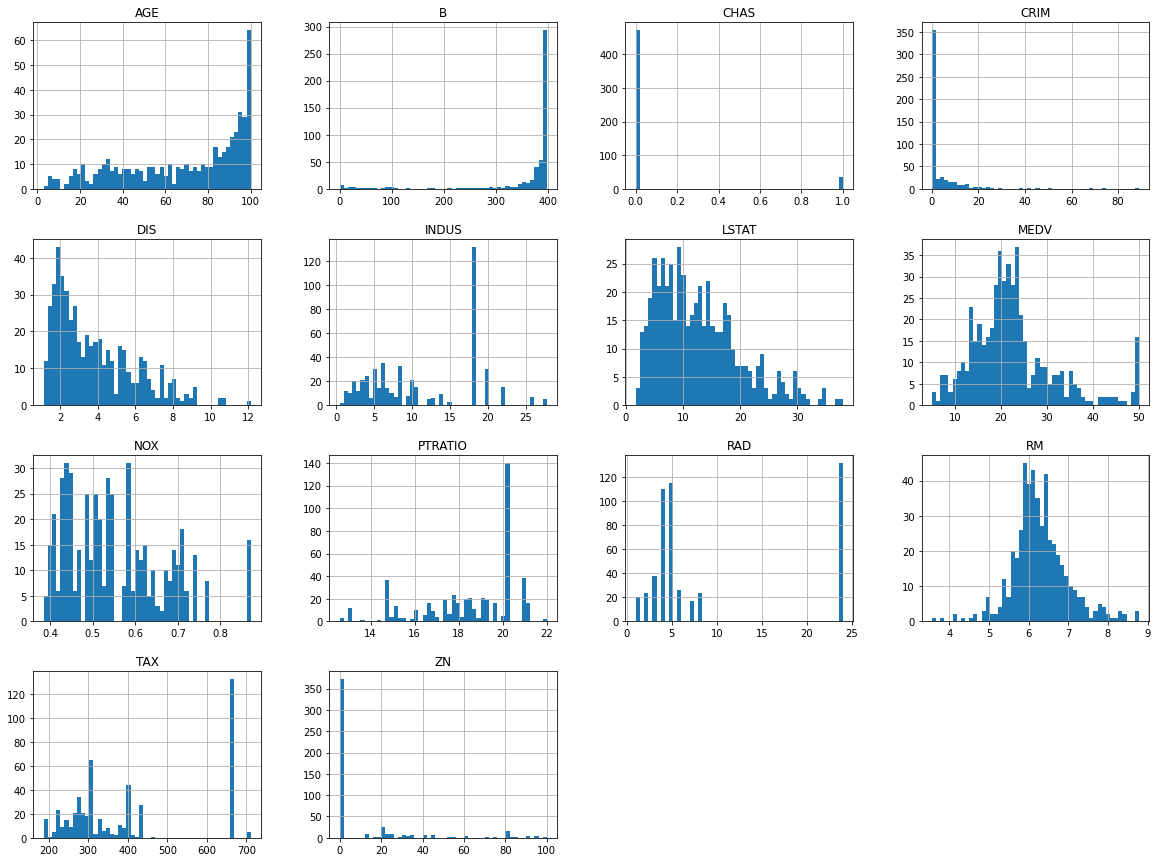

In [9]:
housing.hist(bins=50, figsize=(20,15))

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
#used because of CHAS data was categorical and had specific values, so that all values of same type do not enter into the train or test set alone

In [11]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=25)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing=strat_train_set.copy()

In [15]:
corr_matrix=housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)
#pearson coefficient of correlation 

MEDV       1.000000
RM         0.710391
ZN         0.390549
B          0.353495
DIS        0.280539
CHAS       0.120440
AGE       -0.402125
CRIM      -0.435356
RAD       -0.436296
NOX       -0.455360
TAX       -0.511720
INDUS     -0.524722
PTRATIO   -0.543316
LSTAT     -0.739691
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026DC3624A60>,
      dtype=object)

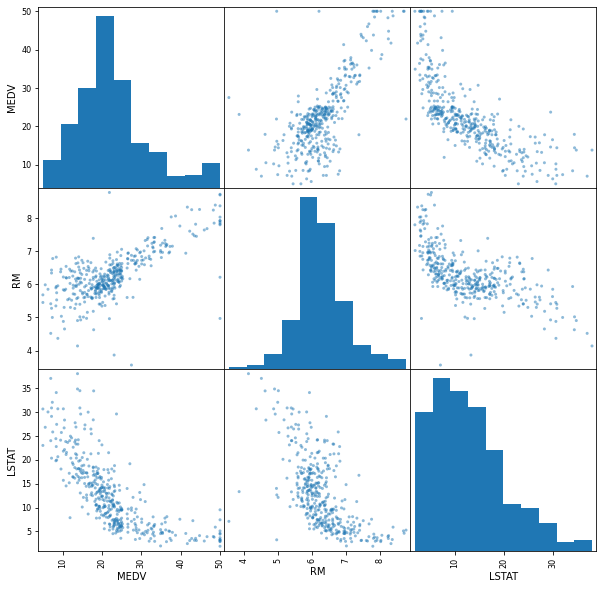

In [17]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(10,10))
#these graphs show the correlation of the most possitive and most negative attributes with medv

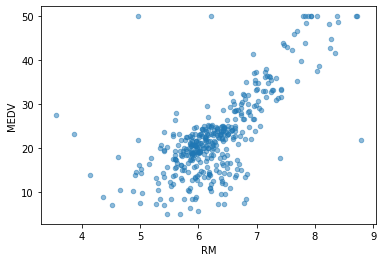

In [18]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)
#these types of graph can be used to eliminate data points like same price for different rm values. So such points(outliers) can be eliminated or checked for better results. This is the main reason why we make correlation matrix.

# Trying attribute combinations

In [19]:
housing['Tax_per_room']=housing['TAX']/housing['RM']

In [20]:
housing['Tax_per_room']


397    115.886550
100     57.083395
281     30.998852
251     51.258155
438    112.215670
          ...    
382    120.303468
411    100.045065
43      37.514088
371    107.142857
234     45.643770
Name: Tax_per_room, Length: 404, dtype: float64

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV            1.000000
RM              0.710391
ZN              0.390549
B               0.353495
DIS             0.280539
CHAS            0.120440
AGE            -0.402125
CRIM           -0.435356
RAD            -0.436296
NOX            -0.455360
TAX            -0.511720
INDUS          -0.524722
PTRATIO        -0.543316
Tax_per_room   -0.576117
LSTAT          -0.739691
Name: MEDV, dtype: float64

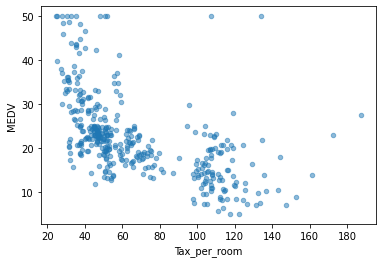

In [22]:
housing.plot(kind="scatter", x="Tax_per_room", y="MEDV", alpha=0.5)

In [23]:
import numpy as np
housing=strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Missing attributes

In [24]:
a=housing.dropna(subset=['RM'])
a.shape
#removing the rows where the value of RM is NA or null value

(395, 13)

In [25]:
b=housing.drop('RM', axis=1).shape
b
#removing the entire RM attribute column, this is not feesible as RM shows strong positive correlation with MEDV and is therefore an important attribute.

(404, 12)

In [26]:
median=housing['RM'].median()
housing['RM'].fillna(median)
#using the median value of the RM column to fill the NA entries in the RM column

397    5.747
100    6.727
281    6.968
251    6.438
438    5.935
       ...  
382    5.536
411    6.657
43     6.211
371    6.216
234    6.726
Name: RM, Length: 404, dtype: float64

In [27]:
housing.shape

(404, 13)

In [28]:
housing.describe() #before applying imputer RM has 395 values

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  395.000000   
mean     3.692658   10.858911   11.033218    0.069307    0.555893    6.291544   
std      8.332614   22.645310    6.775883    0.254290    0.114239    0.736429   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.087962    0.000000    5.190000    0.000000    0.453000    5.886000   
50%      0.274475    0.000000    9.690000    0.000000    0.538000    6.202000   
75%      3.694070   12.500000   18.100000    0.000000    0.625750    6.635000   
max     73.534100   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.025743    3.756562    9.678218  406.603960   18.482178  354.488540   
std     28.233420    2.069613    8.723228  169.560479    2.143900   94.492523   
min      2.900000    1.137000    1.000000  187.000000   12.600000    2.600000   
25%     45.800000    2.106075    4.000000  278.500000   17.400000  374.702500   
50%     78.500000    3.190950    5.000000  330.000000   19.100000  390.980000   
75%     94.150000    5.104475   24.000000  666.000000   20.200000  396.217500   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.803515  
std      7.372716  
min      1.920000  
25%      6.742500  
50%     11.465000  
75%     17.102500  
max     37.970000

In [29]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)
#imputer applies all the values as calculated (mean, median or most occured values) to the data set in all places in the train set and also later on if there occurs a case of some missing data then it already has pre calculated values to be fitted in the data set

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.74475e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20200e+00, 7.85000e+01, 3.19095e+00, 5.00000e+00, 3.30000e+02,
       1.91000e+01, 3.90980e+02, 1.14650e+01])

In [31]:
imputer.statistics_.shape
#median stat calculated for all the 15 attributes

(13,)

In [32]:
X=imputer.transform(housing)
#X will be an array
#imputing is a way to automate the process of dealing with missing data

In [33]:
housing_tr=pd.DataFrame(X, columns=housing.columns)

In [34]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.692658   10.858911   11.033218    0.069307    0.555893    6.289550   
std      8.332614   22.645310    6.775883    0.254290    0.114239    0.728279   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.087962    0.000000    5.190000    0.000000    0.453000    5.888000   
50%      0.274475    0.000000    9.690000    0.000000    0.538000    6.202000   
75%      3.694070   12.500000   18.100000    0.000000    0.625750    6.630250   
max     73.534100   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.025743    3.756562    9.678218  406.603960   18.482178  354.488540   
std     28.233420    2.069613    8.723228  169.560479    2.143900   94.492523   
min      2.900000    1.137000    1.000000  187.000000   12.600000    2.600000   
25%     45.800000    2.106075    4.000000  278.500000   17.400000  374.702500   
50%     78.500000    3.190950    5.000000  330.000000   19.100000  390.980000   
75%     94.150000    5.104475   24.000000  666.000000   20.200000  396.217500   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.803515  
std      7.372716  
min      1.920000  
25%      6.742500  
50%     11.465000  
75%     17.102500  
max     37.970000

##SKlearn pipeline


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [36]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr #this is a numoy array and this will be only used in the predictors

array([[ 0.47815678, -0.48011598,  1.04422473, ...,  0.80225375,
         0.40912587,  0.96644296],
       [-0.42584382, -0.48011598, -0.36545561, ...,  1.12916637,
         0.42671518, -0.45949286],
       [-0.43925478,  0.40416419, -1.13826779, ..., -1.67294182,
         0.39990738, -1.11542334],
       ...,
       [-0.42455812, -0.48011598, -0.60926825, ..., -0.27188773,
         0.42353639, -0.72838362],
       [ 0.66563871, -0.48011598,  1.04422473, ...,  0.80225375,
         0.12356448, -0.44455449],
       [-0.38988619, -0.48011598, -0.71418156, ..., -0.50539674,
         0.06051846, -0.64554354]])

## Model training


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression() the rmse was approx 4 and mse was approx 21.
#model=DecisionTreeRegressor() the rmse and mse was 0. Over fitting of data.
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [39]:
some_data=housing.iloc[:5]

In [40]:
some_labels=housing_labels.iloc[:5]

In [41]:
prepared_data=my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([10.682, 26.128, 35.021, 25.022,  8.345])

In [43]:
list(some_labels)

[8.5, 27.5, 35.4, 24.8, 8.4]

## evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [45]:
lin_rmse, lin_mse

(1.3812571204063575, 1.9078712326732625)

## Cross validation for model evaluation

In [49]:
#cross validation is creating a set of few training points and training the model on it except for one point and then testing on the one left point and doing this for all the points to find the error
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [50]:
list(rmse_scores)

[3.001582948232809,
 4.397295543576869,
 2.9790043556899195,
 2.9966383726745147,
 5.049894258793942,
 4.27398514269762,
 4.554190806279423,
 2.6741006852771996,
 2.738840867958563,
 4.75750469258833]

In [51]:
def print_scores_of_validation(scores):
    print("Scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [52]:
print_scores_of_validation(rmse_scores)

Scores: [3.00158295 4.39729554 2.97900436 2.99663837 5.04989426 4.27398514
 4.55419081 2.67410069 2.73884087 4.75750469]
mean: 3.7423037673769186
standard deviation: 0.8914365657326961
